In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Cell type : CodeWrite
def Bayes1a(X_train, Y_train, X_test):
    """
    Give prediction for test instance using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n, 2)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test: numpy array of shape (m, 2)

    Returns:
    Y_test_pred: +1/-1 numpy array of shape (m,)


    """
    # Separate the training data by class
    X_train_class1 = X_train[Y_train == 1]
    X_train_class2 = X_train[Y_train == -1]

    # Calculate the means of each class
    mean_class1 = np.mean(X_train_class1, axis=0)
    mean_class2 = np.mean(X_train_class2, axis=0)

    # Identity covariance matrix
    I = np.eye(X_train.shape[1])

    # Calculate the linear discriminant boundary parameters
    inv_cov_matrix = np.linalg.inv(I)
    w = np.dot(inv_cov_matrix, (mean_class1 - mean_class2))
    b = -0.5 * np.dot(mean_class1.T, np.dot(inv_cov_matrix, mean_class1)) + 0.5 * np.dot(mean_class2.T, np.dot(inv_cov_matrix, mean_class2))

    # Classify the test instances
    Y_test_pred = np.sign(np.dot(X_test, w) + b)

    return Y_test_pred


def Bayes1b(X_train, Y_train, X_test):
    X_train_class1 = X_train[Y_train == 1]
    X_train_class2 = X_train[Y_train == -1]

    # Calculate the means of each class
    mean_class1 = np.mean(X_train_class1, axis=0)
    mean_class2 = np.mean(X_train_class2, axis=0)

    # Estimate the shared covariance matrix
    cov_matrix = np.cov(X_train, rowvar=False)

    # Calculate the inverse of the covariance matrix
    inv_cov_matrix = np.linalg.inv(cov_matrix)

    # Calculate the linear discriminant boundary parameters
    w = np.dot(inv_cov_matrix, (mean_class1 - mean_class2))
    b = -0.5 * np.dot(mean_class1.T, np.dot(inv_cov_matrix, mean_class1)) + 0.5 * np.dot(mean_class2.T, np.dot(inv_cov_matrix, mean_class2))

    # Classify the test instances
    Y_test_pred = np.sign(np.dot(X_test, w) + b)

    return Y_test_pred

def Bayes1c(X_train, Y_train, X_test):
    X_train_class1 = X_train[Y_train == 1]
    X_train_class2 = X_train[Y_train == -1]


    mean_class1 = np.mean(X_train_class1, axis=0)
    mean_class2 = np.mean(X_train_class2, axis=0)

    # Estimate the covariance matrices for each class
    cov_matrix_class1 = np.cov(X_train_class1, rowvar=False)
    cov_matrix_class2 = np.cov(X_train_class2, rowvar=False)

    # Calculate the inverse and determinant of the covariance matrices
    inv_cov_matrix_class1 = np.linalg.inv(cov_matrix_class1)
    inv_cov_matrix_class2 = np.linalg.inv(cov_matrix_class2)
    det_cov_matrix_class1 = np.linalg.det(cov_matrix_class1)
    det_cov_matrix_class2 = np.linalg.det(cov_matrix_class2)

    # Define a function to calculate the quadratic discriminant function for each class
    def quadratic_discriminant(x, mean, inv_cov_matrix, det_cov_matrix):
        return -0.5 * np.dot(np.dot((x - mean), inv_cov_matrix), (x - mean).T) - 0.5 * np.log(det_cov_matrix)

    # Calculate the discriminant score for each test instance for both classes
    delta_class1 = np.apply_along_axis(quadratic_discriminant, 1, X_test, mean_class1, inv_cov_matrix_class1, det_cov_matrix_class1)
    delta_class2 = np.apply_along_axis(quadratic_discriminant, 1, X_test, mean_class2, inv_cov_matrix_class2, det_cov_matrix_class2)

    # Assign class labels based on which discriminant score is greater
    Y_test_pred = np.where(delta_class1 > delta_class2, 1, -1)

    return Y_test_pred

In [3]:
# Cell type : Convenience
# Testing the functions above
# You may use the example here for testing syntax issues
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just
# solve the problem for this one example given below.)

X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)

# print ("Y_pred_test_1a", Y_pred_test_1a)
# print ("Y_pred_test_1b", Y_pred_test_1b)
# print ("Y_pred_test_1c", Y_pred_test_1c)

# output -
# Y_pred_test_1a [-1.  1.  1. ... -1. -1. -1.]
# Y_pred_test_1b [-1.  1.  1. ... -1. -1. -1.]
# Y_pred_test_1c [-1  1  1 ... -1 -1 -1]


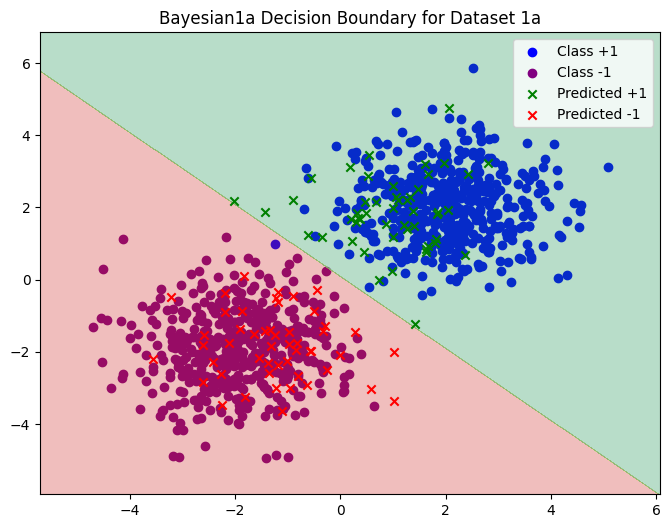

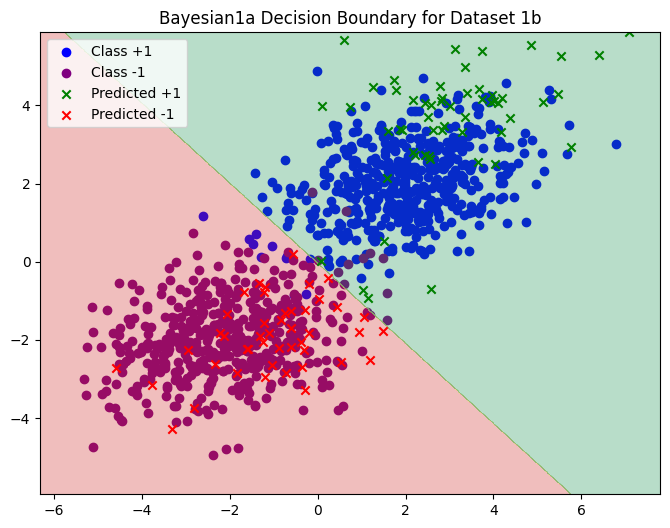

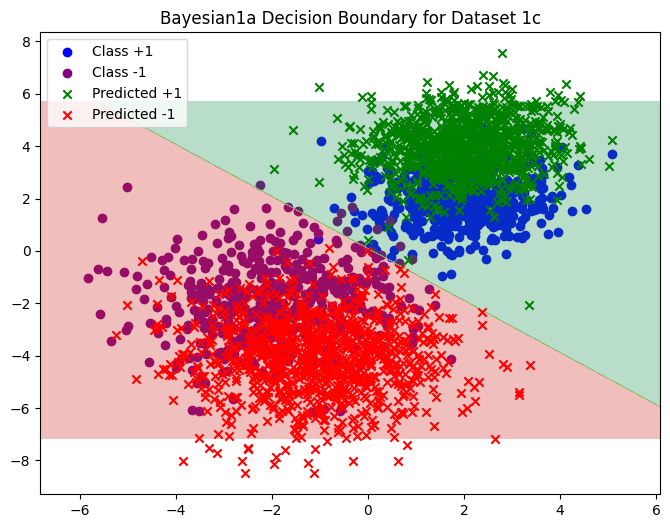

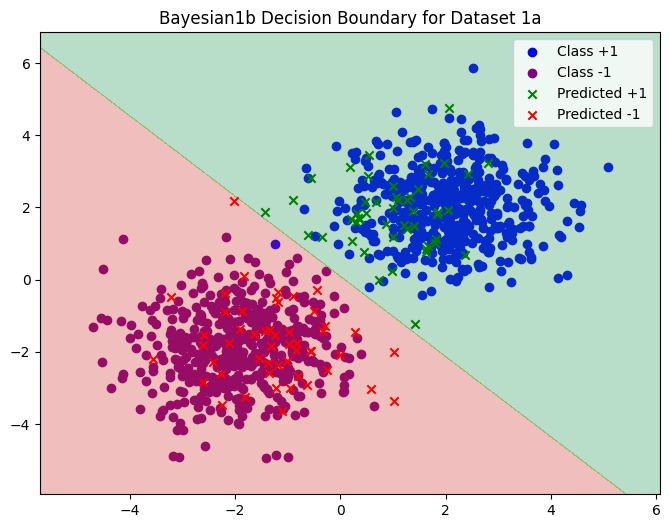

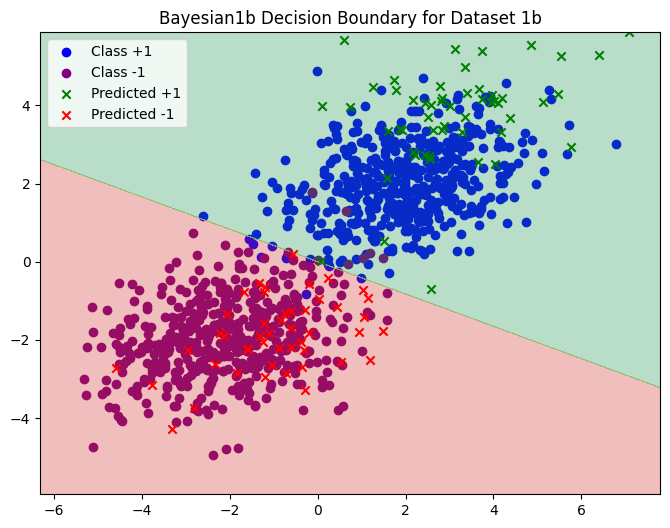

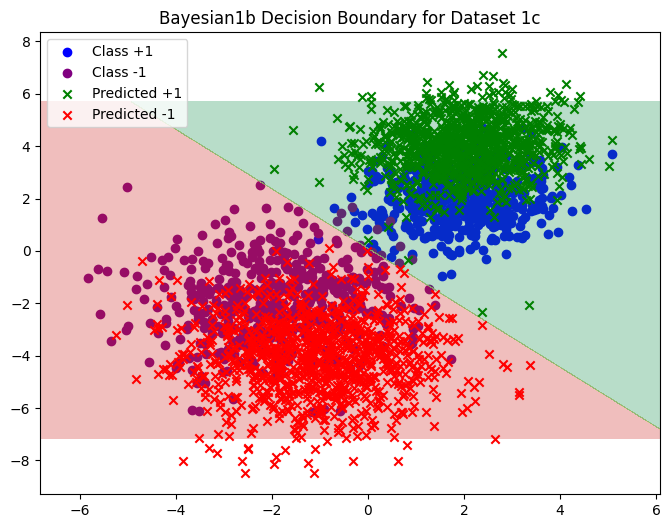

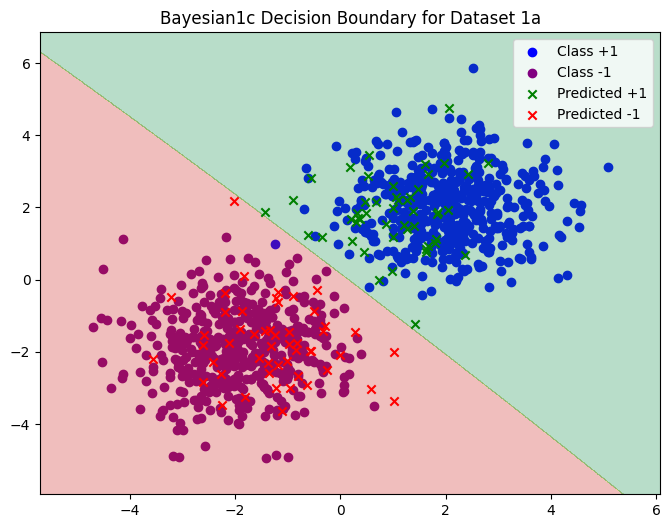

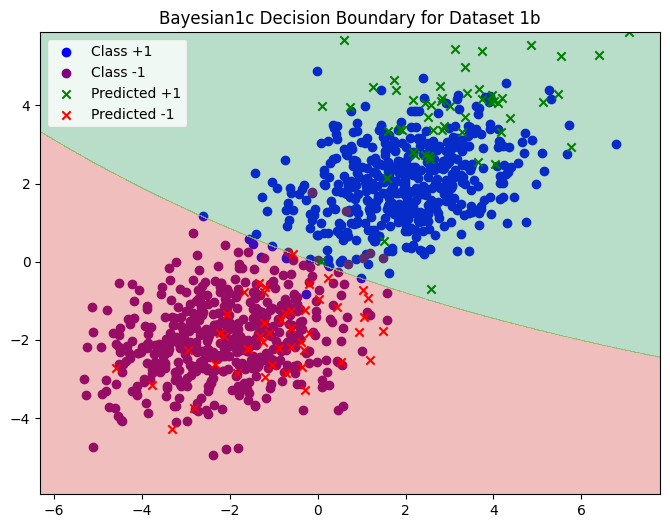

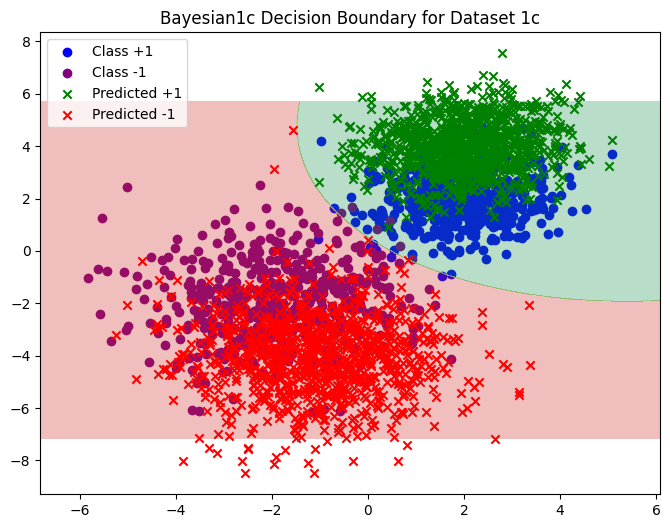

In [4]:
# Cell type : CodeWrite
# Write the code for loading the data, running the three algos, and plotting here.
# Assume that the three datasets are labeled dataset_1a.npz, dataset_1b.npz, and dataset_1c.npz
# (Use the functions written previously)

#generating dataset:
def generate_dataset_1a():
    np.random.seed(42)
    mean_class1 = [2, 2]
    mean_class2 = [-2, -2]
    cov_matrix = np.eye(2)  # Identity matrix

    X_train_class1 = np.random.multivariate_normal(mean_class1, cov_matrix, 500)
    X_train_class2 = np.random.multivariate_normal(mean_class2, cov_matrix, 500)
    X_train = np.vstack((X_train_class1, X_train_class2))
    Y_train = np.hstack((np.ones(500), -1 * np.ones(500)))

    X_test_class1 = np.random.multivariate_normal([1,2], cov_matrix, 50)
    X_test_class2 = np.random.multivariate_normal([-1,-2], cov_matrix, 50)
    X_test = np.vstack((X_test_class1, X_test_class2))
    # For dataset 1a, Y_test_pred will be the same as Y_test
    Y_test = np.hstack((np.ones(50), -1 * np.ones(50)))

    np.savez('dataset1a.npz', X_train=X_train, Y_train=Y_train, X_test=X_test, Y_test=Y_test)


def generate_dataset_1b():
    np.random.seed(42)
    mean_class1 = [2, 2]
    mean_class2 = [-2, -2]
    cov_matrix = [[2, 0.5], [0.5, 1]]  # Same covariance for both classes

    X_train_class1 = np.random.multivariate_normal(mean_class1, cov_matrix, 500)
    X_train_class2 = np.random.multivariate_normal(mean_class2, cov_matrix, 500)
    X_train = np.vstack((X_train_class1, X_train_class2))
    Y_train = np.hstack((np.ones(500), -1 * np.ones(500)))

    X_test_class1 = np.random.multivariate_normal([3,4], cov_matrix, 50)
    X_test_class2 = np.random.multivariate_normal([-1,-2], cov_matrix, 50)
    X_test = np.vstack((X_test_class1, X_test_class2))
    # For dataset 1b, Y_test_pred will be the same as Y_test
    Y_test = np.hstack((np.ones(50), -1 * np.ones(50)))

    np.savez('dataset1b.npz', X_train=X_train, Y_train=Y_train, X_test=X_test, Y_test=Y_test)

def generate_dataset_1c():
    np.random.seed(42)
    mean_class1 = [2, 2]
    mean_class2 = [-2, -2]
    cov_matrix_class1 = [[1, 0.1], [0.1, 1]]
    cov_matrix_class2 = [[2, 0], [0, 2]]

    X_train_class1 = np.random.multivariate_normal(mean_class1, cov_matrix_class1, 500)
    X_train_class2 = np.random.multivariate_normal(mean_class2, cov_matrix_class2, 500)
    X_train = np.vstack((X_train_class1, X_train_class2))
    Y_train = np.hstack((np.ones(500), -1 * np.ones(500)))

    X_test_class1 = np.random.multivariate_normal([2,4], cov_matrix_class1, 1000)
    X_test_class2 = np.random.multivariate_normal([-1,-4], cov_matrix_class2, 1000)
    X_test = np.vstack((X_test_class1, X_test_class2))
    # For dataset 1c, Y_test_pred will be the same as Y_test
    Y_test = np.hstack((np.ones(1000), -1 * np.ones(1000)))

    np.savez('dataset1c.npz', X_train=X_train, Y_train=Y_train, X_test=X_test, Y_test=Y_test)

generate_dataset_1a()
generate_dataset_1b()
generate_dataset_1c()


#plotting the data
def plot_decision_boundary(X_train, Y_train, X_test, Y_test_pred,model, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X_train[Y_train == 1][:, 0], X_train[Y_train == 1][:, 1], color='blue', label='Class +1')
    plt.scatter(X_train[Y_train == -1][:, 0], X_train[Y_train == -1][:, 1], color='purple', label='Class -1')

    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model(X_train, Y_train, grid_points)
    Z = Z.reshape(xx.shape)
    # plt.contourf(xx, yy, Z, alpha=0.3, levels=np.linspace(Z.min(), Z.max(), 7))
    plt.contourf(xx, yy, Z, alpha=0.3, levels=np.linspace(Z.min(), Z.max(), 7), cmap=plt.cm.RdYlGn)
    plt.scatter(X_test[Y_test_pred == 1][:, 0], X_test[Y_test_pred == 1][:, 1], color='green', marker='x', label='Predicted +1')
    plt.scatter(X_test[Y_test_pred == -1][:, 0], X_test[Y_test_pred == -1][:, 1], color='red', marker='x', label='Predicted -1')
    plt.title(title)
    plt.legend()
    plt.show()


def load_data(npz_file):
    data = np.load(npz_file)
    X_train = data['X_train']
    Y_train = data['Y_train']
    X_test = data['X_test']
    Y_test = data['Y_test']
    return X_train, Y_train, X_test, Y_test

def calculate_accuracy(Y_test, Y_test_pred):
    correctly_predicted = 0
    for true_label, predicted in zip(Y_test, Y_test_pred):
        if true_label == predicted:
            correctly_predicted += 1
    accuracy_score = correctly_predicted / len(Y_test)
    return accuracy_score


X_train_1, Y_train_1, X_test_1, Y_test_1 = load_data('dataset1a.npz')
X_train_2, Y_train_2, X_test_2, Y_test_2 = load_data('dataset1b.npz')
X_train_3, Y_train_3, X_test_3, Y_test_3 = load_data('dataset1c.npz')
Y_test_pred_1 = Bayes1a(X_train_1, Y_train_1, X_test_1)
Y_test_pred_2 = Bayes1a(X_train_2, Y_train_2, X_test_2)
Y_test_pred_3 = Bayes1a(X_train_3, Y_train_3, X_test_3)
plot_decision_boundary(X_train_1, Y_train_1, X_test_1, Y_test_pred_1, Bayes1a, "Bayesian1a Decision Boundary for Dataset 1a")
accuracy = calculate_accuracy(Y_test_1, Y_test_pred_1)
#print(f"Accuracy: {accuracy}") = 0.98
plot_decision_boundary(X_train_2, Y_train_2, X_test_2, Y_test_pred_2, Bayes1a, "Bayesian1a Decision Boundary for Dataset 1b")
accuracy = calculate_accuracy(Y_test_2, Y_test_pred_2)
#print(f"Accuracy: {accuracy}") =0.95
plot_decision_boundary(X_train_3, Y_train_3, X_test_3, Y_test_pred_3, Bayes1a, "Bayesian1a Decision Boundary for Dataset 1c")
accuracy = calculate_accuracy(Y_test_3, Y_test_pred_3)
#print(f"Accuracy: {accuracy}")= 0.9985

X_train_1, Y_train_1, X_test_1, Y_test_1 = load_data('dataset1a.npz')
X_train_2, Y_train_2, X_test_2, Y_test_2 = load_data('dataset1b.npz')
X_train_3, Y_train_3, X_test_3, Y_test_3 = load_data('dataset1c.npz')
Y_test_pred_1 = Bayes1b(X_train_1, Y_train_1, X_test_1)
Y_test_pred_2 = Bayes1b(X_train_2, Y_train_2, X_test_2)
Y_test_pred_3 = Bayes1b(X_train_3, Y_train_3, X_test_3)
plot_decision_boundary(X_train_1, Y_train_1, X_test_1, Y_test_pred_1, Bayes1b, "Bayesian1b Decision Boundary for Dataset 1a")
accuracy = calculate_accuracy(Y_test_1, Y_test_pred_1)
#print(f"Accuracy: {accuracy}") = 0.97
plot_decision_boundary(X_train_2, Y_train_2, X_test_2, Y_test_pred_2, Bayes1b, "Bayesian1b Decision Boundary for Dataset 1b")
accuracy = calculate_accuracy(Y_test_2, Y_test_pred_2)
#print(f"Accuracy: {accuracy}") = 0.97
plot_decision_boundary(X_train_3, Y_train_3, X_test_3, Y_test_pred_3, Bayes1b, "Bayesian1b Decision Boundary for Dataset 1c")
accuracy = calculate_accuracy(Y_test_3, Y_test_pred_3)
# print(f"Accuracy: {accuracy}") = 0.998

X_train_1, Y_train_1, X_test_1, Y_test_1 = load_data('dataset1a.npz')
X_train_2, Y_train_2, X_test_2, Y_test_2 = load_data('dataset1b.npz')
X_train_3, Y_train_3, X_test_3, Y_test_3 = load_data('dataset1c.npz')
Y_test_pred_1 = Bayes1c(X_train_1, Y_train_1, X_test_1)
Y_test_pred_2 = Bayes1c(X_train_2, Y_train_2, X_test_2)
Y_test_pred_3 = Bayes1c(X_train_3, Y_train_3, X_test_3)
plot_decision_boundary(X_train_1, Y_train_1, X_test_1, Y_test_pred_1, Bayes1c, "Bayesian1c Decision Boundary for Dataset 1a")
accuracy = calculate_accuracy(Y_test_1, Y_test_pred_1)
#print(f"Accuracy: {accuracy}") = 0.97
plot_decision_boundary(X_train_2, Y_train_2, X_test_2, Y_test_pred_2, Bayes1c, "Bayesian1c Decision Boundary for Dataset 1b")
accuracy = calculate_accuracy(Y_test_2, Y_test_pred_2)
#print(f"Accuracy: {accuracy}") = 0.96
plot_decision_boundary(X_train_3, Y_train_3, X_test_3, Y_test_pred_3, Bayes1c, "Bayesian1c Decision Boundary for Dataset 1c")
accuracy = calculate_accuracy(Y_test_3, Y_test_pred_3)
#print(f"Accuracy: {accuracy}") = 0.999


As per our observations , we get :
Bayes1a, which was derived from the same covariance matrix (being identity), uses LDA as the optimal learning algorithm, and performs the best for dataset1a amongst Bayes1a, 1b and 1c.
Bayes1b also uses LDA as the optimal learning algorithm, as the covariance matrix is the same (but not identity) and performs the best for dataset1b amongst Bayes1a, 1b and 1c.
Bayes1c uses QDA (as the covariance matrix is not the same) and performs the best for dataset1c amongst Bayes1a, 1b and 1c.

Accuracy table:

|  | Dataset1a | Dataset1b | Dataset1c |
| :-----: | :-----: | :-----: | :-----: |
| Bayes1a | 0.98 | 0.95 | 0.9985 |
| Bayes1b | 0.97 | 0.97 | 0.998 |
| Bayes1c | 0.97 | 0.96 | 0.999 |


In [5]:
def Bayes2a(X_train, Y_train, X_test):
    classes = np.unique(Y_train)
    means = [X_train[Y_train == c].mean(axis=0) for c in classes]

    # Compute the shared covariance matrix
    cov_matrix = np.cov(X_train, rowvar=False)
    inv_cov_matrix = np.linalg.inv(cov_matrix)

    Y_test_pred = []
    for x in X_test:
        discriminants = []
        for mean in means:
            # Calculate the discriminant function for each class
            discriminant = x @ inv_cov_matrix @ mean - 0.5 * mean.T @ inv_cov_matrix @ mean
            discriminants.append(discriminant)
        # Assign the class with the highest discriminant value
        Y_test_pred.append(classes[np.argmax(discriminants)])

    return np.array(Y_test_pred)

def Bayes2b(X_train, Y_train, X_test):
    means = [X_train[Y_train == c].mean(axis=0) for c in np.unique(Y_train)]
    cov = np.cov(X_train, rowvar=False)
    inv_cov = np.linalg.inv(cov)
    Y_test_pred = []
    for x in X_test:
        probs = [np.exp(-0.5 * (x - mean).T @ inv_cov @ (x - mean)) for mean in means]
        Y_test_pred.append(np.argmax(probs) + 1)
    return np.array(Y_test_pred)

def Bayes2c(X_train, Y_train, X_test):
    means = [X_train[Y_train == c].mean(axis=0) for c in np.unique(Y_train)]
    covs = [np.cov(X_train[Y_train == c], rowvar=False) for c in np.unique(Y_train)]
    inv_covs = [np.linalg.inv(cov) for cov in covs]
    log_dets = [np.linalg.slogdet(cov)[1] for cov in covs]
    Y_test_pred = []

    for x in X_test:
        log_probs = []
        for i, mean in enumerate(means):
            diff = x - mean
            log_prob = -0.5 * (diff.T @ inv_covs[i] @ diff) - 0.5 * log_dets[i]
            log_probs.append(log_prob)
        Y_test_pred.append(np.argmax(log_probs) + 1)

    return np.array(Y_test_pred)

In [6]:
# Cell type : Convenience
 # Testing the functions above
mat1=np.array([[1.,0.],[0.,1.]])
mat2=np.array([[1.,0.],[0.,1.]])
mat3=np.array([[1.,0.],[0.,1.]])
mat4=np.array([[1.,0.],[0.,1.]])
X_train_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_train_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_train_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])
X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)
Y_train = np.concatenate(( 1*np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000)))
X_test_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_test_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_test_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])
X_test = np.concatenate((X_test_1, X_test_2, X_test_3, X_test_4), axis=0)
Y_test = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000)))
Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)

# print (Y_pred_test_2a)
# print (Y_pred_test_2b)
# print (Y_pred_test_2c)

# #output -
# [1. 1. 1. ... 3. 4. 4.]
# [1 1 1 ... 3 4 4]
# [1 1 1 ... 3 4 4]

<ipython-input-7-f87c098bdfcf>:56: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, edgecolors='k', marker='x')


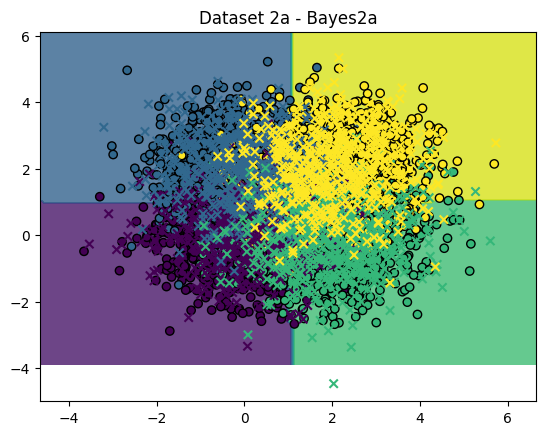

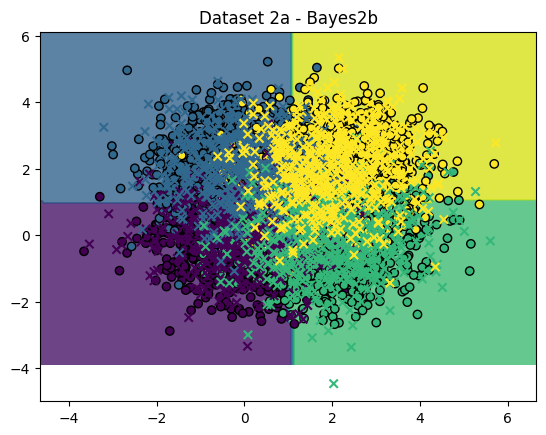

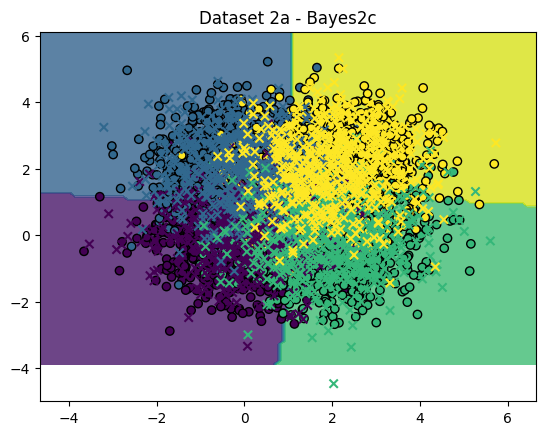

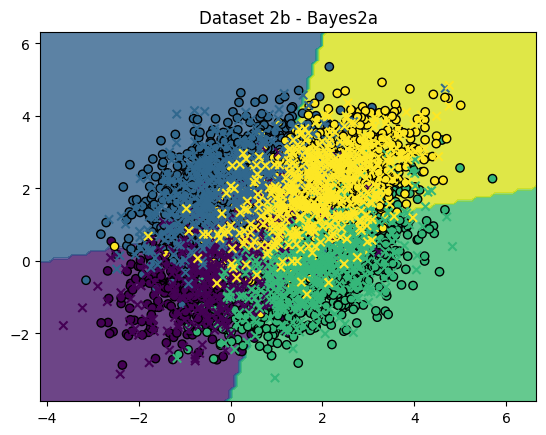

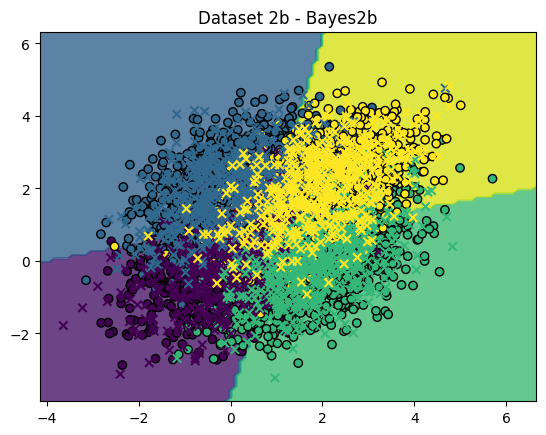

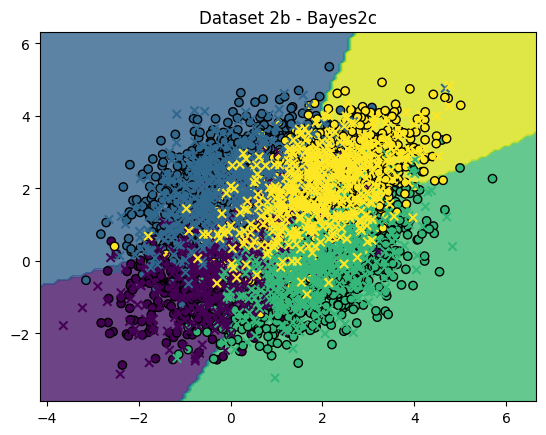

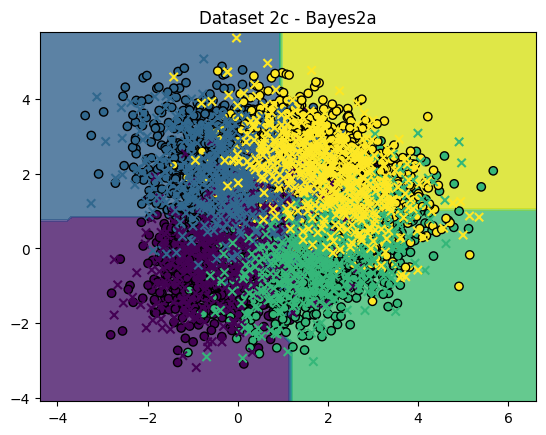

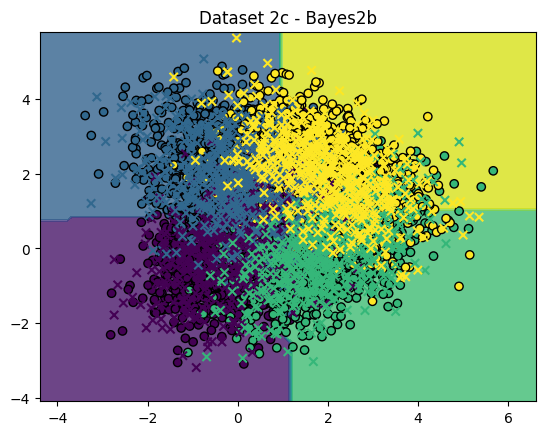

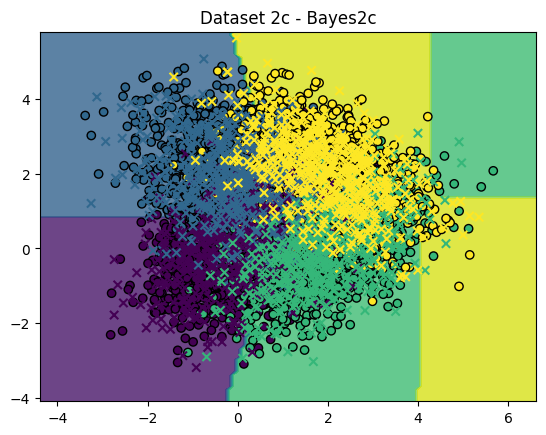

In [7]:
def generate_dataset_2a():
    n = 1000
    means = [np.array([0, 0]), np.array([0, 2]), np.array([2, 0]), np.array([2, 2])]
    X_train = np.vstack([np.random.multivariate_normal(mean, np.eye(2), n) for mean in means])
    Y_train = np.hstack([np.ones(n)*i for i in range(1, 5)])
    X_test = np.vstack([np.random.multivariate_normal(mean, np.eye(2), n//2) for mean in means])
    Y_test = np.hstack([np.ones(n//2)*i for i in range(1, 5)])
    return X_train, Y_train, X_test, Y_test

def generate_dataset_2b():
    n = 1000
    mean1 = np.array([0, 0])
    mean2 = np.array([0, 2])
    mean3 = np.array([2, 0])
    mean4 = np.array([2, 2])
    cov = np.array([[1, 0.5], [0.5, 1]])
    means = [mean1, mean2, mean3, mean4]
    X_train = np.vstack([np.random.multivariate_normal(mean, cov, n) for mean in means])
    Y_train = np.hstack([np.ones(n)*i for i in range(1, 5)])
    X_test = np.vstack([np.random.multivariate_normal(mean, cov, n//2) for mean in means])
    Y_test = np.hstack([np.ones(n//2)*i for i in range(1, 5)])
    return X_train, Y_train, X_test, Y_test

def generate_dataset_2c():
    n = 1000
    mean1 = np.array([0, 0])
    mean2 = np.array([0, 2])
    mean3 = np.array([2, 0])
    mean4 = np.array([2, 2])
    covs = [np.array([[1, 0.3], [0.3, 1]]), np.array([[1, -0.3], [-0.3, 1]]),
            np.array([[1, 0.5], [0.5, 1]]), np.array([[1, -0.5], [-0.5, 1]])]
    means = [mean1, mean2, mean3, mean4]
    X_train = np.vstack([np.random.multivariate_normal(means[i], covs[i], n) for i in range(4)])
    Y_train = np.hstack([np.ones(n)*i for i in range(1, 5)])
    X_test = np.vstack([np.random.multivariate_normal(means[i], covs[i], n//2) for i in range(4)])
    Y_test = np.hstack([np.ones(n//2)*i for i in range(1, 5)])
    return X_train, Y_train, X_test, Y_test

# Save datasets to files
datasets = {"2a": generate_dataset_2a, "2b": generate_dataset_2b, "2c": generate_dataset_2c}

for key, generate_fn in datasets.items():
    X_train, Y_train, X_test, Y_test = generate_fn()
    np.savez(f"dataset_{key}.npz", X_train=X_train, Y_train=Y_train, X_test=X_test, Y_test=Y_test)


def plot_decision_boundary(clf, X_train, Y_train, X_test, Y_test, title):
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = clf(np.c_[xx.ravel(), yy.ravel()])  # Note the change here
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, edgecolors='k', marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, edgecolors='k', marker='x')
    plt.title(title)
    plt.show()

# Load datasets
dataset_titles = {"2a": "Dataset 2a", "2b": "Dataset 2b", "2c": "Dataset 2c"}
classifiers = [Bayes2a, Bayes2b, Bayes2c]

for ds in dataset_titles.keys():
    data = np.load(f"dataset_{ds}.npz")
    X_train, Y_train = data["X_train"], data["Y_train"]
    X_test, Y_test = data["X_test"], data["Y_test"]
    for clf, clf_name in zip(classifiers, ["Bayes2a", "Bayes2b", "Bayes2c"]):
        plot_decision_boundary(lambda X: clf(X_train, Y_train, X), X_train, Y_train, X_test, Y_test, f"{dataset_titles[ds]} - {clf_name}")

As per our observations , we get : Bayes2a, which was derived from the same covariance matrix (being identity), uses LDA as the optimal learning algorithm, and performs the best for dataset1a amongst Bayes2a, 2b and 2c. Bayes2b also uses LDA as the optimal learning algorithm, as the covariance matrix is the same (but not identity) and performs the best for dataset1b amongst Bayes2a, 2b and 2c. Bayes2c uses QDA (as the covariance matrix is not the same) and performs the best for dataset1c amongst Bayes1a, 1b and 1c.

Accuracy table:

|  | Dataset1a | Dataset1b | Dataset1c |
| :-----: | :-----: | :-----: | :-----: |
| Bayes2a | 0.69 | 0.68 | 0.68 |
| Bayes2b | 0.70 | 0.73 | 0.72 |
| Bayes2c | 0.70 | 0.71 | 0.73 |



